In [11]:
import pandas as pd
import numpy as np
import requests
import zipfile
import io

url = "https://s3.amazonaws.com/hubway-data/202301-bluebikes-tripdata.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
df = pd.read_csv(z.open("202301-bluebikes-tripdata.csv"))
df.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
0,250,2023-01-01 00:02:54.0800,2023-01-01 00:07:04.4100,36,Copley Square - Dartmouth St at Boylston St,42.349928,-71.077392,21,Prudential Center - 101 Huntington Ave,42.346520,-71.080658,4213,Subscriber,02115
1,489,2023-01-01 00:10:33.3100,2023-01-01 00:18:42.3690,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3153,Customer,NaN
2,461,2023-01-01 00:10:49.9130,2023-01-01 00:18:31.1280,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3431,Customer,02186
3,1065,2023-01-01 00:13:58.0640,2023-01-01 00:31:43.5090,58,Mugar Way at Beacon St,42.355536,-71.072869,345,Park Plaza at Charles St S.,42.351828,-71.067811,4398,Customer,NaN
4,601,2023-01-01 00:14:02.6130,2023-01-01 00:24:03.8950,50,Boylston St at Berkeley St,42.351142,-71.073292,374,Tremont St at Hamilton Pl,42.356683,-71.061666,7964,Subscriber,02138


## Missing Data

In [13]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

tripduration - 0%
starttime - 0%
stoptime - 0%
start station id - 0%
start station name - 0%
start station latitude - 0%
start station longitude - 0%
end station id - 0%
end station name - 0%
end station latitude - 0%
end station longitude - 0%
bikeid - 0%
usertype - 0%
postal code - 6%


## Irregular Data

<AxesSubplot: >

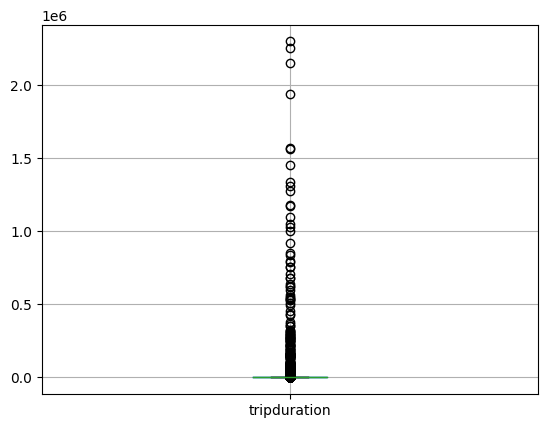

In [5]:
df.boxplot(column="tripduration")

In [30]:
df[df["tripduration"] > 8.64e+5].sort_values("tripduration")

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
32843,922292,2023-01-09 22:26:02.3160,2023-01-20 14:37:34.5580,508,855 Broadway,42.398418,-71.023909,503,Cary Square,42.398136,-71.030710,5138,Subscriber,02150
47000,1002064,2023-01-12 16:43:21.3110,2023-01-24 07:04:25.3840,21,Prudential Center - 101 Huntington Ave,42.346520,-71.080658,1,18 Dorrance Warehouse,42.387151,-71.075978,4092,Subscriber,02113
82151,1031519,2023-01-21 01:04:15.4320,2023-02-01 23:36:15.1260,404,Mass Ave T Station,42.341356,-71.083370,1,18 Dorrance Warehouse,42.387151,-71.075978,6664,Customer,02116
115410,1046995,2023-01-28 01:37:39.6820,2023-02-09 04:27:34.9270,549,Valenti Way at Haverhill St,42.364739,-71.059349,389,Everett Square (Broadway at Chelsea St),42.407435,-71.055332,6804,Customer,20850
92164,1095167,2023-01-23 20:48:18.1860,2023-02-05 13:01:05.2810,337,Roslindale Village - South St,42.287072,-71.127754,363,Harrison Ave at Mullins Way,42.345216,-71.063840,6143,Customer,02131
42774,1169975,2023-01-11 17:42:41.6340,2023-01-25 06:42:17.0650,536,Clinton St at North St,42.360703,-71.055249,171,Bunker Hill Community College,42.374090,-71.069060,5356,Customer,05733
51921,1181162,2023-01-13 16:27:04.4470,2023-01-27 08:33:06.9630,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,-71.048927,1,18 Dorrance Warehouse,42.387151,-71.075978,3373,Subscriber,02139
94540,1271800,2023-01-24 14:27:57.5090,2023-02-08 07:44:37.6050,441,Sullivan Square,42.384452,-71.075149,392,Glendale Square (Ferry St at Broadway),42.414273,-71.044797,4877,Customer,02149
59784,1310114,2023-01-16 05:03:30.8790,2023-01-31 08:58:45.6460,8,Union Square - Brighton Ave at Cambridge St,42.353334,-71.137313,458,Watertown Sq,42.365260,-71.185733,6706,Customer,02134
48834,1337790,2023-01-12 22:27:03.2520,2023-01-28 10:03:33.7880,372,Boylston St at Exeter St,42.349589,-71.079468,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,2673,Customer,NaN


In [14]:
df["tripduration"].describe()

count    1.403400e+05
mean     1.260807e+03
std      1.935545e+04
min      6.100000e+01
25%      3.860000e+02
50%      6.170000e+02
75%      1.001000e+03
max      2.296250e+06
Name: tripduration, dtype: float64

In [36]:
drop_index = df[df["tripduration"] > 4.32e+5].index
df_cleaned = df.drop(drop_index, axis=0)
df_cleaned["tripduration"].describe()

count    140301.000000
mean        985.787215
std        5707.041199
min          61.000000
25%         386.000000
50%         617.000000
75%        1000.000000
max      431349.000000
Name: tripduration, dtype: float64

In [20]:
df_dedupped = df["tripduration"].drop_duplicates()
print(df["tripduration"].shape)
print(df_dedupped.shape)

(140340,)
(4884,)


In [21]:
df["tripduration"].value_counts()

478        204
385        201
403        195
342        194
379        193
          ... 
4146         1
3681         1
2791         1
2148879      1
17630        1
Name: tripduration, Length: 4884, dtype: int64

## Takeaways:
- Some trips are extremely long, the longest being nearly a month! While this is terrible for someone's credit card bill, this isn't particular representative of the larger sample and skews the data. Any rides that are longer than a 12 hours (43,200 seconds) are dropped. 